In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis
## IRIS data

Plotting data according to instructions

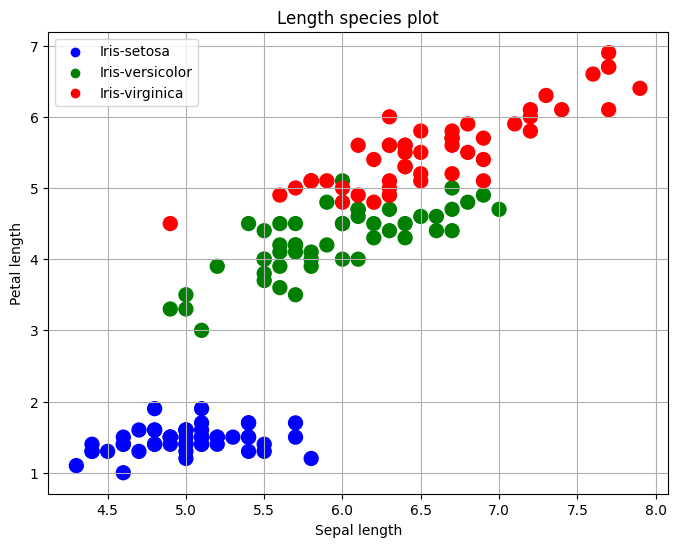

In [150]:
# Define a color map for the categories
color_map = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}

# Map the 'species' column to colors
colors = df["species"].map(color_map)

plt.figure(figsize=(8,6))

# Scatter plot 
plt.scatter(df["sepal_length"], df["petal_length"], c=colors, s=100)

# Add a legend for categories
for category, color in color_map.items():
    plt.scatter([], [], c=color, label=f"{category}") 

# Customize the plot
plt.title("Length species plot")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

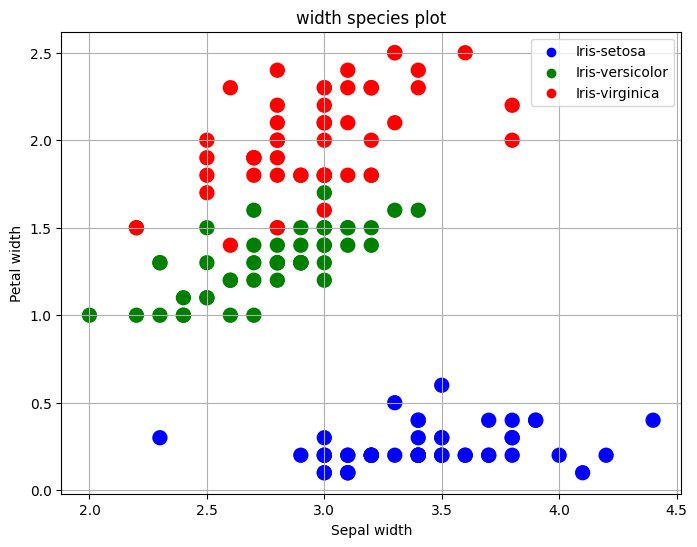

In [151]:
# Define a color map for the categories
color_map = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}

# Map the 'species' column to colors
colors = df["species"].map(color_map)

plt.figure(figsize=(8,6))

# Scatter plot 
plt.scatter(df["sepal_width"], df["petal_width"], c=colors, s=100)

# Add a legend for categories
for category, color in color_map.items():
    plt.scatter([], [], c=color, label=f"{category}")  # Dummy scatter for legend

# Customize the plot
plt.title("width species plot")
plt.xlabel("Sepal width")
plt.ylabel("Petal width")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Two of the three species appear to have a positive correlation between the measured widths and lengths, while the third species seems to show a random pattern in the visualization.

C:\Users\ounas\AppData\Local\Temp\ipykernel_5916\2864645500.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_by_species, labels=species1)
C:\Users\ounas\AppData\Local\Temp\ipykernel_5916\2864645500.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_by_species, labels=species1)
C:\Users\ounas\AppData\Local\Temp\ipykernel_5916\2864645500.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_by_species, labels=species1)
C:\Users\ounas\AppData\Local\Temp\ipykernel_5916\2864645500.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has

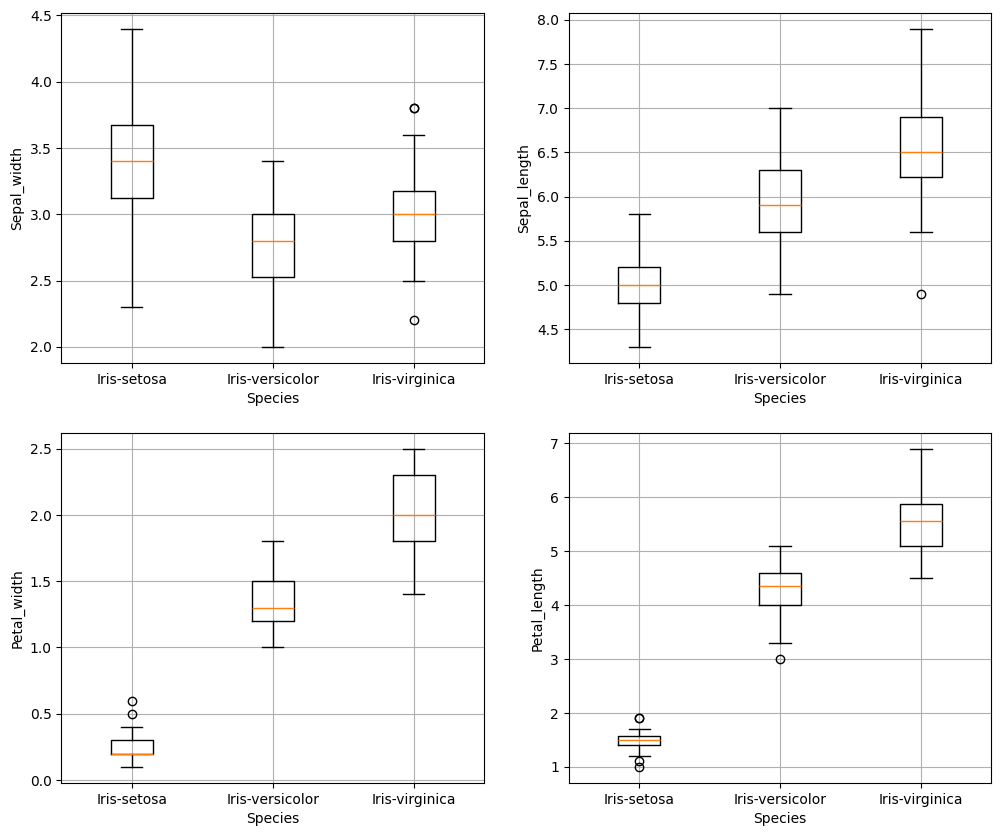

In [152]:
# List of variables to create box plots
variables = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
species1 = df["species"].unique()

# Set up subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid for the variables
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, var in enumerate(variables):
    # Group data by species for the current variable
    data_by_species = [df[df["species"] == sp][var] for sp in species1]
    
    # Create a box plot for the current variable
    axes[i].boxplot(data_by_species, labels=species1)
    
    # Customize the plot
    axes[i].set_xlabel("Species")
    axes[i].set_ylabel(var.capitalize())
    axes[i].grid(True)


# Show the plot
plt.show()


From these box plots we can conclude that the third spices, iris-setosa, is behaving differently compared to the other two.

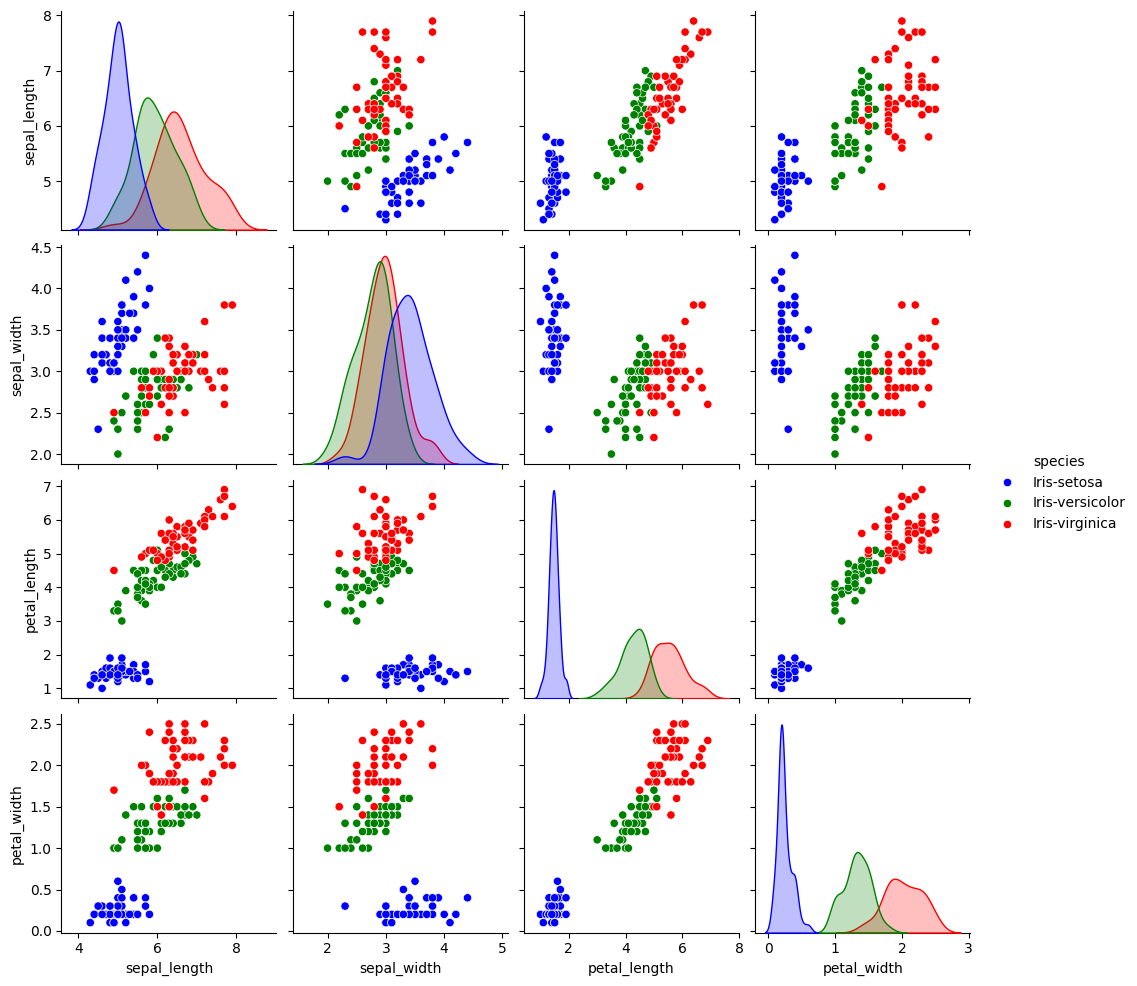

In [153]:
sns.pairplot(df[["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]], 
             hue="species", 
             palette=color_map)
plt.show()



Like mentioned before, there seems to be a positive correlation in some varibles in the case of versicolor and virginica, while setosa looks more random .

## Birdwatching

In [154]:
df_2=pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv")

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21916 entries, 0 to 21915
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      21916 non-null  int64 
 1   Taxonsorteringsordning  21916 non-null  int64 
 2   Rödlistade              4777 non-null   object
 3   Artnamn                 21916 non-null  object
 4   Vetenskapligt namn      21916 non-null  object
 5   Auktor                  21843 non-null  object
 6   Antal                   21916 non-null  object
 7   Ålder/stadium           757 non-null    object
 8   Kön                     2023 non-null   object
 9   Aktivitet               16745 non-null  object
 10  Lokalnamn               21916 non-null  object
 11  Ostkoordinat            21916 non-null  int64 
 12  Nordkoordinat           21916 non-null  int64 
 13  Noggrannhet             21916 non-null  int64 
 14  Diffusion               21916 non-null  int64 
 15  Lä

What are the most prevelant species?

In [155]:
arter = df_2["Artnamn"]

räknade_arter = {}

for i in arter:
    if i in räknade_arter:
        räknade_arter[i] += 1
    else:
        räknade_arter[i] = 1

max_key = max(räknade_arter, key=räknade_arter.get)

max_key

'Koltrast'

What is the monthly distribution of the top 3 most prevelant species?

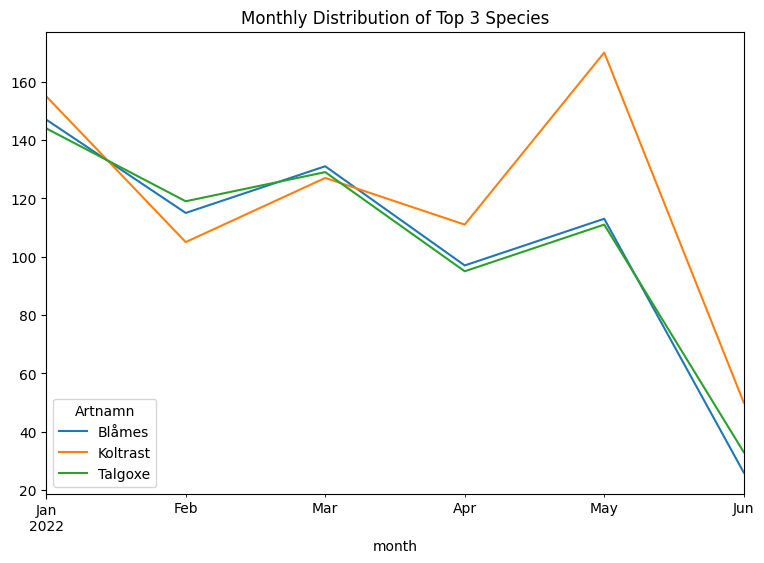

In [156]:
sort_arter = sorted(räknade_arter.items(), key=lambda item: item[1], reverse=True)
top_3 = sort_arter[0:3]
top_3[1]

new_df_2 = df_2[['Artnamn', 'Slutdatum']]
new_df_2 = new_df_2[new_df_2['Artnamn'].isin([top_3[0][0], top_3[1][0], top_3[2][0]])]

new_df_2['Slutdatum'] = pd.to_datetime(new_df_2['Slutdatum'])

new_df_2['month'] = new_df_2['Slutdatum'].dt.to_period('M')

m_counts_df = new_df_2.groupby(['month', 'Artnamn']).size().unstack(fill_value=0)

m_counts_df.plot(
    subplots=False,  # Creates one plot
    figsize=(9, 6),
    title='Monthly Distribution of Top 3 Species'
)

# Step 3: Customize the layout
plt.show()

What are the rarest species?

In [162]:
sort_arter_2 = sorted(räknade_arter.items(), key=lambda item: item[1], reverse=False)

rare_arter = [key for key, value in sort_arter_2 if value == 1]
rare_arter


['Ob. korsnäbb',
 'Strömstare',
 'Fjällvråk',
 'Bändelkorsnäbb',
 'Ormvråk, underarten buteo',
 'Trädlärka',
 'Ob. gås',
 'Röd glada',
 'Forsärla',
 'Knipskrake',
 'Gråhakedopping',
 'Doppingfåglar',
 'Tundrasädgås',
 'Spetsbergsgås',
 'Fiskgjuse',
 'Vinterhämpling',
 'Spillkråka',
 'Ljungpipare',
 'Tornfalk',
 'Ob. bo-/bergfink',
 'Ob. fisk-/silvertärna',
 'Lappsparv',
 'Ejder',
 'Gravand',
 'Mellanskarv',
 'Rödbena',
 'Kustlabb',
 'Bivråk',
 'Ägretthäger',
 'Nordlig gulärla',
 'Varfågel',
 'Prutgås',
 'Storlom',
 'Rosenfink',
 'Måsfåglar']

The list above is all rare species, based on the fact that they were only observed exactly once during the period.